In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
import torch.optim as optim

Burda her resmin boyutu aynı değil. Bunlar aynı olmak zorunda. Çünkü model oluştururken aynı katmandan geçecekler.

In [2]:
transform = transforms.Compose([
    transforms.Resize((96, 96)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [3]:
train_data= torchvision.datasets.Flowers102(
    root= "data_flower",
    split= "train",
    transform=transform,
    target_transform=None,
    download=True,
)

100%|██████████| 344862509/344862509 [00:11<00:00, 30511809.12it/s]


Extracting data_flower/flowers-102/102flowers.tgz to data_flower/flowers-102


100%|██████████| 502/502 [00:00<00:00, 336940.41it/s]


100%|██████████| 14989/14989 [00:00<00:00, 33836610.69it/s]


yukarda kiler sayesinde her image boyutu aynı oldu.

In [4]:
train_data[0][0].shape , train_data[1][0].shape , train_data[2][0].shape

(torch.Size([3, 96, 96]), torch.Size([3, 96, 96]), torch.Size([3, 96, 96]))

In [5]:
test_data= torchvision.datasets.Flowers102(
    root= "data_flower",
    split= "test",
    transform=transform,
    target_transform=None,
    download=True,
)

In [6]:
test_data[0][0].shape , test_data[1][0].shape , test_data[2][0].shape

(torch.Size([3, 96, 96]), torch.Size([3, 96, 96]), torch.Size([3, 96, 96]))

In [7]:
list(train_data)[0:3]

[(tensor([[[-1.8782, -1.7925, -1.8953,  ..., -1.8268, -0.8164,  0.3138],
           [-1.7925, -1.8439, -1.9124,  ..., -1.8268, -0.7308,  0.3309],
           [-1.7925, -1.8610, -1.9124,  ..., -1.8439, -0.5424,  0.3823],
           ...,
           [-1.6727, -1.8097, -1.8953,  ...,  0.1083,  0.0569, -0.0458],
           [-1.6384, -1.6384, -1.7412,  ...,  0.1597,  0.0398, -0.0458],
           [-1.6384, -1.6042, -1.6898,  ...,  0.2111,  0.0227, -0.0629]],
  
          [[-1.6155, -1.4580, -1.5805,  ..., -1.5455, -1.0028, -0.2675],
           [-1.6155, -1.5980, -1.6506,  ..., -1.5630, -0.9503, -0.3025],
           [-1.7031, -1.7031, -1.7381,  ..., -1.5980, -0.8277, -0.2675],
           ...,
           [-1.2479, -1.4580, -1.7381,  ..., -0.1099, -0.1625, -0.2675],
           [-1.1429, -1.2129, -1.5630,  ..., -0.0924, -0.1800, -0.2675],
           [-1.0903, -1.0728, -1.2829,  ..., -0.1625, -0.1800, -0.3200]],
  
          [[-1.6476, -1.6302, -1.6650,  ..., -1.6127, -0.5844,  0.8099],
           

In [8]:
#train_data.classes()

In [9]:
len(train_data)

1020

In [10]:
image, label= train_data[0]

matplotlib yükseklik , genişlik ve kanal şeklinde aldıgı için permute ile o hale geitdim boyutları.

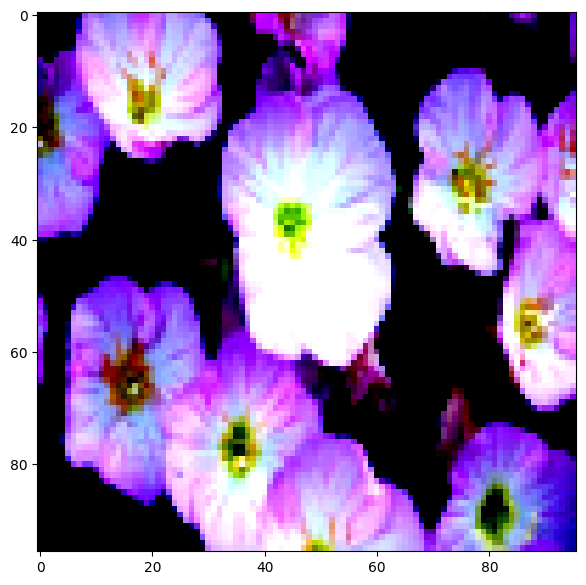

In [11]:
plt.figure(figsize=(7,7))
plt.imshow(image.permute(1, 2, 0).numpy())
plt.show()

<ipython-input-12-f5477b5d125e>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  image, label=train_data[int(np.random.randint(0,1019,size=1))]


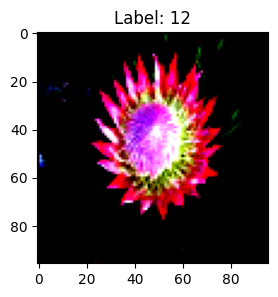

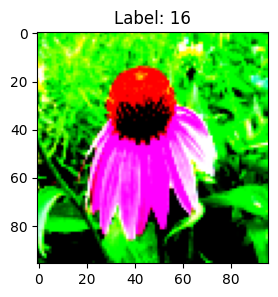

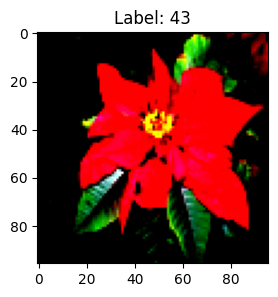

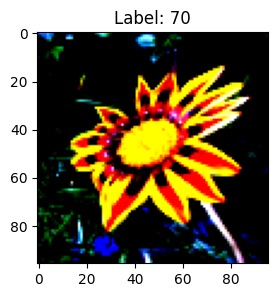

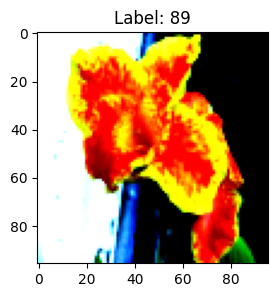

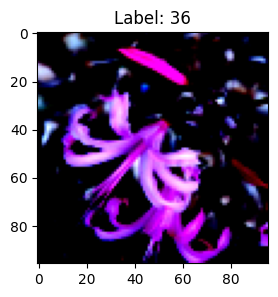

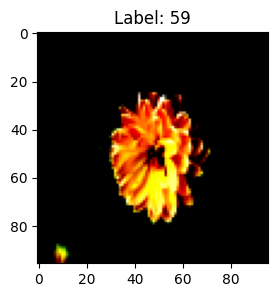

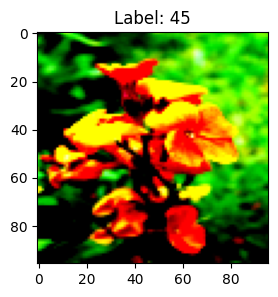

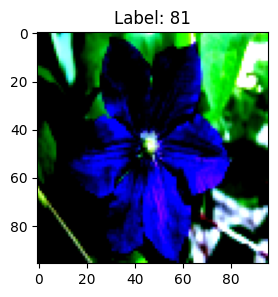

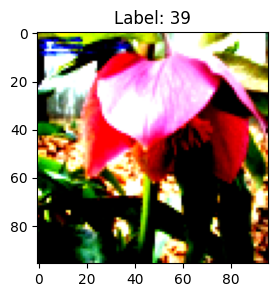

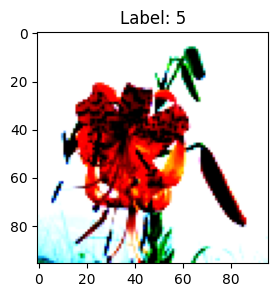

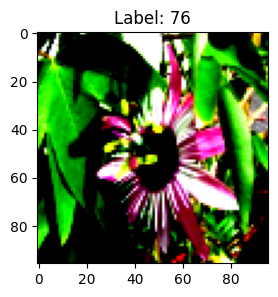

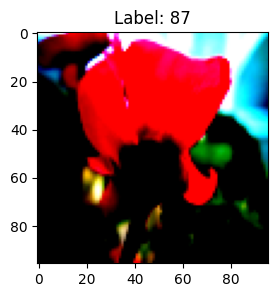

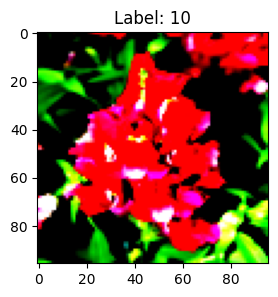

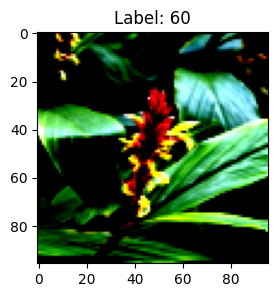

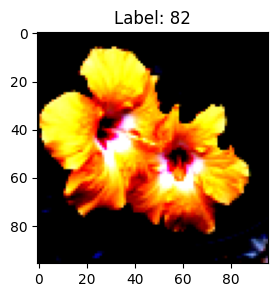

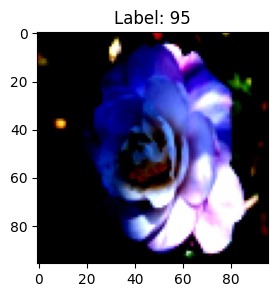

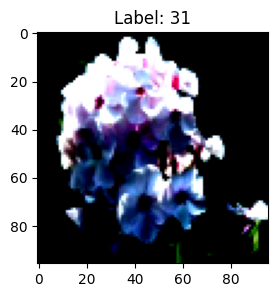

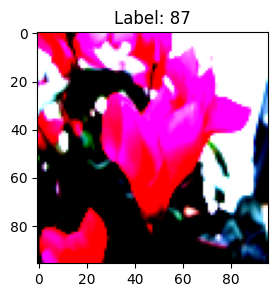

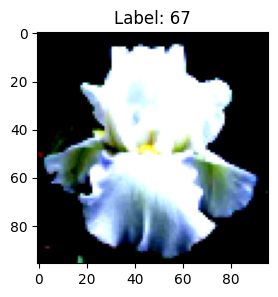

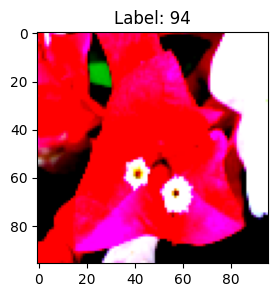

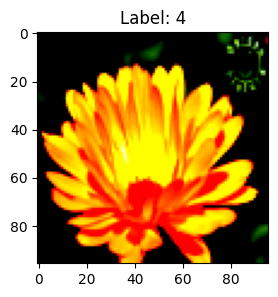

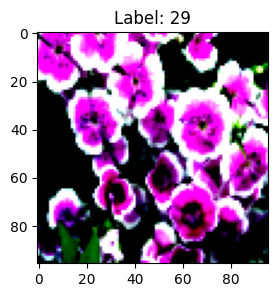

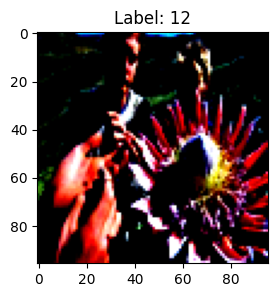

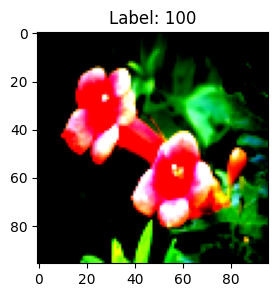

In [12]:
np.random.seed(seed=4)
rows=5
cols=5
for row in range(rows):
  for col in range(cols):
    image, label=train_data[int(np.random.randint(0,1019,size=1))]
    plt.figure(figsize=(3,3))
    plt.title(f"Label: {label}")
    plt.imshow(image.permute(1, 2, 0).numpy())
    plt.show()


In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [14]:
train_loader = DataLoader(train_data, shuffle=True, batch_size=32)
test_loader = DataLoader(test_data, shuffle=False, batch_size=32)
train_loader

In [ ]:
class FlowerModel(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),


    )

  def forward(self,x):
    return self.layer_stack(x)


In [16]:
"""for batch,(X,y_label) in enumerate(train_loader):
  print(f"{batch},{X,y_label}")"""

'for batch,(X,y_label) in enumerate(train_loader):\n  print(f"{batch},{X,y_label}")'

In [21]:
import requests
url="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py"
response = requests.get(url)


with open("helper_functions.py", "wb") as f:
  f.write(response.content)

from helper_functions import accuracy_fn

In [22]:
torch.manual_seed(42)

model0=FlowerModel(input_shape=96*96*3,hidden_units=512, output_shape=102)
model0.to(device)

epochs= 200
params= model0.parameters()

lossFn= nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params, lr=0.1)



for epoch in range(epochs):
  print(epoch)
  train_loss= 0
  for batch, (X,y_label) in enumerate(train_loader):
    model0.train()
    X, y_label= X.to(device), y_label.to(device)
    train_pred= model0(X)
    loss=lossFn(train_pred,y_label)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss/=len(train_loader)

  acc=0
  test_loss= 0
  model0.eval()
  with torch.inference_mode():
    for X, y_label in test_loader:
      X, y_label= X.to(device), y_label.to(device)
      test_pred=model0(X)
      loss=lossFn(test_pred,y_label)
      test_loss += loss
      acc+= accuracy_fn(y_label,test_pred.argmax(dim=1))

    test_loss/=len(test_loader)
    acc /= len(test_loader)

  if epoch%2==0:
    print(f"{epoch}.epoch >>> train loss= {train_loss:5f}----test loss= {test_loss:.5f}-----accuracy= {acc:.2f}%")



0
0.epoch >>> train loss= 4.624849----test loss= 4.62473-----accuracy= 2.51%
1
2
2.epoch >>> train loss= 4.623764----test loss= 4.62396-----accuracy= 2.36%
3
4
4.epoch >>> train loss= 4.618632----test loss= 4.61319-----accuracy= 2.01%
5
6
6.epoch >>> train loss= 4.606857----test loss= 4.61372-----accuracy= 2.19%
7


KeyboardInterrupt: 